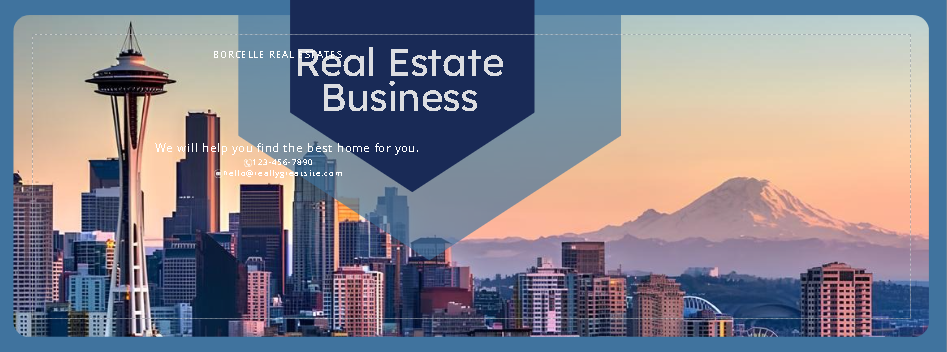

## Sumary

0. Imports and Setup
    - 0.1 Page Formatting
    - 0.2 Data Collection and Loading
1. Business Understanding
- 1.1 Project Objective
- 1.2 Key Questions and Business Requirements
2. Data Dictionary and Initial Exploration
- 2.1 Dataset Overview
- 2.2 Feature Descriptions and Definitions
- 2.3 Data Quality Checks
3. Analysis and Findings
- 3.1 Exploratory Data Analysis (EDA)
- 3.2 Key Insights and Patterns
4. Conclusion and Recommendations
- 4.1 Summary of Findings
- 4.2 Actionable Recommendations
5. Exporting Results and Final Output
6. References and Additional Resources

## 0.Imports

In [1]:
from IPython.display import display, Markdown, Image
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import inflection 
import pathlib

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)


colors = ["#9467bd", "#057476", "#FF7A00"]
# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

### 0.1 Page Formatting

In [2]:
from IPython.core.display import HTML

HTML('''
<style>
    /* Aplicar fonte monoespaçada a todo o notebook */
    body, div.text_cell_render, div.code_cell pre, h1, h2, h3, p {
        font-family: "Courier New", Consolas, Monaco, monospace; /* Fonte monoespaçada */
    }
    
    /* Estilo para células de markdown com cabeçalhos */
    h1, h2, h3 {
        background-color: #e0f7e9;   /* Fundo verde claro */
        border-radius: 8px;          /* Bordas arredondadas */
        padding: 10px;
    }
</style>
''')

### 0.2 Data Collection

In [3]:
# caminho onde estar os arquivos dos dados
data_path = pathlib.Path(r'C:/Users/Yago/Desktop/GitHubLocal/UFC/ComputationalIntelligence/HW1/2.data/')

# creating an empty data frame to store the data
df_raw_seattle = pd.DataFrame()

# Performing a 'for' loop to go through each file present in 'data_path' and add it to 'df_seattle'
for arquivo in data_path.iterdir():
    df = pd.read_csv(data_path / arquivo.name)
    df_raw_seattle = df_raw_seattle.append(df)
    

C:\Users\Yago\AppData\Local\Temp\ipykernel_9212\110105329.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_raw_seattle = df_raw_seattle.append(df)
C:\Users\Yago\AppData\Local\Temp\ipykernel_9212\110105329.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_raw_seattle = df_raw_seattle.append(df)
C:\Users\Yago\AppData\Local\Temp\ipykernel_9212\110105329.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_raw_seattle = df_raw_seattle.append(df)
C:\Users\Yago\AppData\Local\Temp\ipykernel_9212\110105329.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_raw_seattle = df_raw_seattle.append(df)


In [4]:
# tamanho inicial da base de dados (sem tratamentos)
df_raw_seattle.shape

(14525, 43)

In [5]:
# visualização dos primeiros registros da base de dados
df_raw_seattle.head()

,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,Address,City,State,ZipCode,Latitude,Longitude,Neighborhood,CouncilDistrictCode,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,PrimaryPropertyType,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUIWN(kBtu/sf),SourceEUI(kBtu/sf),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),EPAPropertyType,ComplianceStatus,ComplianceIssue,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,NumberofBuildings
0,1,2019,MAYFLOWER PARK HOTEL,NonResidential,0659000030,405 OLIVE WAY,SEATTLE,WA,98101.0,47.61220,-122.33799,DOWNTOWN,1.0,1927,12,88434,88434,0,Hotel,62.0,83.3,83.1,7363218.0,7351864.0,167.6,167.6,Hotel,88434.0,NaN,NaN,NaN,NaN,1134817.0,2159078.0,13208.0,Hotel,Compliant,No Issue,3871996.0,1320791.0,208.8,2.4,NaN
1,2,2019,PARAMOUNT HOTEL,NonResidential,0659000220,724 PINE ST,SEATTLE,WA,98101.0,47.61317,-122.33393,DOWNTOWN,1.0,1996,11,103566,88502,15064,Hotel,70.0,90.9,90.5,8040648.0,8006404.0,153.7,153.3,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,863688.0,0.0,50595.0,Hotel,Compliant,No Issue,2946902.0,5059502.0,286.9,3.2,NaN
2,3,2019,WESTIN HOTEL (Parent Building),NonResidential,0659000475,1900 5TH AVE,SEATTLE,WA,98101.0,47.61367,-122.33822,DOWNTOWN,1.0,1969,41,956110,759392,196718,Hotel,64.0,90.4,90.0,68355568.0,68103264.0,201.5,201.1,Hotel,756493.0,Parking,138635.0,Swimming Pool,0.0,12917890.0,22601024.0,14264.0,Hotel,Compliant,No Issue,44075841.0,1426400.0,1549.0,2.0,NaN
3,5,2019,HOTEL MAX,NonResidential,0659000640,620 STEWART ST,SEATTLE,WA,98101.0,47.61412,-122.33664,DOWNTOWN,1.0,1926,10,61320,61320,0,Hotel,58.0,103.5,103.0,6346838.0,6319004.0,177.5,176.3,Hotel,61320.0,NaN,NaN,NaN,NaN,645119.0,2104444.0,20134.0,Hotel,Compliant,No Issue,2201145.0,2013415.0,232.4,3.8,NaN
4,8,2019,WARWICK SEATTLE HOTEL,NonResidential,0659000970,401 LENORA ST,SEATTLE,WA,98121.0,47.61375,-122.34047,DOWNTOWN,1.0,1980,18,175580,113580,62000,Hotel,63.0,128.6,128.6,15875107.0,15875107.0,212.2,212.2,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,1595784.0,0.0,104303.0,Hotel,Compliant,No Issue,5444815.0,10430292.0,587.5,5.2,NaN


## 1. Entendimento do Negócio 

## 2. Construction of the Data Dictionary


Nessa primeira etapa é muito importante mapeamos os nossos dados, primeiro para conhecer cada um e identificar qual característica ou informação aquele dado expressa. Esse dicionário também se rá importante para conferimos o tipo de dados se estar corretamente especificado, e será importante para consultamos essas informações no decorrer do projeto, para, por exemplo, dividimos os dados em categorias e realizar analises com base no tipo do dado.

Organização e Padronização: O dicionário de dados descreve as variáveis, suas definições, tipos de dados, unidades e restrições. Essa documentação organiza os dados e garante que todos entendam o que cada campo representa, evitando ambiguidade.

Escalabilidade: Se o projeto for expandido no futuro, o dicionário de dados ajuda a integrar novos dados ou variáveis de forma estruturada e a garantir que a base existente seja preservada.

Facilita a Colaboração: Um dicionário de dados é uma referência para todos os envolvidos no projeto (equipe de TI, analistas, usuários finais). Isso torna mais fácil para novos membros da equipe entenderem rapidamente a estrutura dos dados.

Documentação e Auditoria: Em projetos de longo prazo, o dicionário de dados serve como um registro que documenta todas as variáveis e suas modificações. Isso é importante para auditorias, para rastrear a origem e a finalidade dos dados e entender mudanças feitas ao longo do tempo.


In [6]:
data_dict = pd.DataFrame([
    {
       "variavel" : "OSEBuildingID",
       "descricao-pt": "Um identificador exclusivo atribuído a cada propriedade coberta pela Portaria de Referência de Seattle para fins de rastreamento e identificação.",
       "descricao-en": "A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.",
       "tipo"     : "quantitative",
       "subtipo"  : "discreet"
    },
    {
       "variavel" : "DataYear",
       "descricao-pt": "Ano civil (janeiro-dezembro) representado por cada registro de dados.",
       "descricao-en": "Calendar year (January-December) represented by each data record.",
       "tipo"     : "quantitative",
       "subtipo"  : "discreet"   
    },
    {
       "variavel" : "BuildingName",
       "descricao-pt": "Nome oficial ou comum da propriedade registrado na cidade de Seattle.",
       "descricao-en": "Official or common property name on record with the City of Seattle.",
       "tipo"     : "quanlitative",
       "subtipo"  : "nominal"
    },
    {
       "variavel" : "BuildingType",
       "descricao-pt": "Classificação de tipo de edifício de alto nível da cidade de Seattle.",
       "descricao-en": "City of Seattle high level building type classification.",
       "tipo"     : "quanlitative",
       "subtipo"  : "nominal"
    },
    {
       "variavel" : "TaxParcelIdentificationNumber",
       "descricao-pt": "Identificador único para a parcela de imposto do edifício.",
       "descricao-en": "Unique identifier for the building’s tax parcel.",
       "tipo"     : "quantitative",
       "subtipo"  : "discreet"
    },
    {
       "variavel" : "Address",
       "descricao-pt": "Endereço do edifício.",
       "descricao-en": "Street address of the building.",
       "tipo"     : "quanlitative",
       "subtipo"  : "nominal"
    },
    {
       "variavel" : "City",
       "descricao-pt": "Cidade onde o edifício está localizado.",
       "descricao-en": "City where the building is located.",
       "tipo"     : "quanlitative",
       "subtipo"  : "nominal"
    },
    {
       "variavel" : "State",
       "descricao-pt": "Sigla do estado onde o edifício está localizado.",
       "descricao-en": "State abbreviation where the building is located.",
       "tipo"     : "quanlitative",
       "subtipo"  : "nominal"
    },
    {
       "variavel" : "Latitude",
       "descricao-pt": "Coordenada de latitude da localização do edifício.",
       "descricao-en": "Latitude coordinate of the building location.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "Longitude",
       "descricao-pt": "Coordenada longitudinais da localização do edifício.",
       "descricao-en": "Longitude coordinate of the building location.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "Neighborhood",
       "descricao-pt": "Área de vizinhança da propriedade definida pelo Departamento de Bairros da Cidade de Seattle.",
       "descricao-en": "Property neighborhood area defined by the City of Seattle Department of Neighborhoods.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "CouncilDistrictCode",
       "descricao-pt": "Propriedade do distrito do conselho da cidade de Seattle.",
       "descricao-en": "Property City of Seattle council district.",
       "tipo"     : "quantitative",
       "subtipo"  : "discreet"
    },
    {
       "variavel" : "YearBuilt",
       "descricao-pt": "Ano em que um imóvel foi construído.",
       "descricao-en": "Year in which a property was constructed.",
       "tipo"     : "quantitative",
       "subtipo"  : "discreet"
    },
    {
       "variavel" : "NumberofFloors",
       "descricao-pt": "Número total de andares do edifício.",
       "descricao-en": "Total number of floors in the building.",
       "tipo"     : "quantitative",
       "subtipo"  : "discreet"
    },
    {
       "variavel" : "PropertyGFATotal",
       "descricao-pt": "Área bruta total do edifício e do estacionamento.",
       "descricao-en": "Total building and parking gross floor area.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "PropertyGFABuilding(s)",
       "descricao-pt": "Área total do piso em pés quadrados entre as superfícies externas das paredes de fechamento de um edifício. Isso inclui todas as áreas dentro do(s) edifício(s), como espaço para inquilinos, áreas comuns, escadas, porões, armazenamento, etc...",
       "descricao-en": "Total floor space in square feet between the outside surfaces of a building’s enclosing walls. This includes all areas inside the building(s), such as tenant space, common areas, stairwells, basements, storage, etc...",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "PropertyGFAParking",
       "descricao-pt": "Espaço total em metros quadrados de todos os tipos de estacionamento (totalmente fechado, parcialmente fechado e aberto).",
       "descricao-en": "Total space in square feet of all types of parking (Fully Enclosed, Partially Enclosed, and Open).",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "PrimaryPropertyType",
       "descricao-pt": "Qual a função primária da propriedade",
       "descricao-en": "What is the primary function of the property",
       "tipo"     : "quanlitative",
       "subtipo"  : "nominal"
    },
    {
       "variavel" : "ENERGYSTARScore",
       "descricao-pt": "Uma classificação de 1-100 calculada pela EPA que avalia o desempenho energético geral de uma propriedade, com base em dados nacionais para controlar as diferenças entre clima, usos de edifícios e operações. Uma pontuação de 50 representa a mediana nacional",
       "descricao-en": "An EPA calculated 1-100 rating that assesses a property’s overall energy performance, based on national data to control for differences among climate, building uses, and operations. A score of 50 represents the national median",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "SiteEUIWN(kBtu/sf)",
       "descricao-pt": "A Intensidade de Uso de Energia do Local (EUI) Normalizada pelo Clima (WN) é a Energia do Local WN de uma propriedade dividida por sua área bruta de piso (em pés quadrados). A Energia do Local WN é o Uso de Energia do Local que a propriedade teria consumido durante as condições climáticas médias de 30 anos. A EUI do Local WN é medida em milhares de unidades térmicas britânicas (kBtu) por pé quadrado.",
       "descricao-en": "Weather Normalized (WN) Site Energy Use Intensity (EUI) is a property's WN Site Energy divided by its gross floor area (in square feet). WN Site Energy is the Site Energy Use the property would have consumed during 30-year average weather conditions. WN Site EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "SiteEUI(kBtu/sf)",
       "descricao-pt": "A Intensidade de Uso de Energia do Local (EUI) é o Uso de Energia do Local de uma propriedade dividido por sua área bruta de piso. O Uso de Energia do Local é a quantidade anual de toda a energia consumida pela propriedade no local, conforme relatado nas contas de serviços públicos. O EUI do Local é medido em milhares de unidades térmicas britânicas (kBtu) por pé quadrado.",
       "descricao-en": "Site Energy Use Intensity (EUI) is a property's Site Energy Use divided by its gross floor area. Site Energy Use is the annual amount of all the energy consumed by the property on-site, as reported on utility bills. Site EUI is measured in thousands of British thermal units (kBtu) per square foot.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "SiteEnergyUse(kBtu)",
       "descricao-pt": "A quantidade anual de energia consumida pela propriedade de todas as fontes de energia.",
       "descricao-en": "The annual amount of energy consumed by the property from all sources of energy.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "SiteEnergyUseWN(kBtu)",
       "descricao-pt": "A quantidade anual de energia consumida pela propriedade de todas as fontes de energia, ajustada ao que a propriedade teria consumido durante as condições climáticas médias de 30 anos.",
       "descricao-en": "The annual amount of energy consumed by the property from all sources of energy, adjusted to what the property would have consumed during 30-year average weather conditions.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "SourceEUIWN(kBtu/sf)",
       "descricao-pt": "A Intensidade de Uso de Energia de Fonte (EUI) Normalizada pelo Clima (WN) é a Energia de Fonte WN de uma propriedade dividida por sua área bruta de piso. A Energia de Fonte WN é o Uso de Energia de Fonte que a propriedade teria consumido durante as condições climáticas médias de 30 anos. A EUI de Fonte WN é medida em milhares de unidades térmicas britânicas (kBtu) por pé quadrado.",
       "descricao-en": "Weather Normalized (WN) Source Energy Use Intensity (EUI) is a property's WN Source Energy divided by its gross floor area. WN Source Energy is the Source Energy Use the property would have consumed during 30-year average weather conditions. WN Source EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "SourceEUI(kBtu/sf)",
       "descricao-pt": "Intensidade de Uso de Energia de Fonte (EUI) é o Uso de Energia de Fonte de uma propriedade dividido por sua área bruta de piso. Uso de Energia de Fonte é a energia anual usada para operar a propriedade, incluindo perdas de geração, transmissão e distribuição. EUI de Fonte é medido em milhares de unidades térmicas britânicas (kBtu) por pé quadrado.",
       "descricao-en": "Source Energy Use Intensity (EUI) is a property's Source Energy Use divided by its gross floor area. Source Energy Use is the annual energy used to operate the property, including losses from generation, transmission, & distribution. Source EUI is measured in thousands of British thermal units (kBtu) per square foot.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "LargestPropertyUseType",
       "descricao-pt": "Tipo de uso primário da maior área do edifício.",
       "descricao-en": "Primary use type of the largest area in the building.",
       "tipo"     : "quanlitative",
       "subtipo"  : "nominal"
    },
    {
       "variavel" : "LargestPropertyUseTypeGFA",
       "descricao-pt": "Área bruta do maior tipo de uso da propriedade.",
       "descricao-en": "Gross floor area of the largest property use type.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "SecondLargestPropertyUseType",
       "descricao-pt": "Tipo de uso secundário da segunda maior área do edifício.",
       "descricao-en": "Secondary use type of the second largest area in the building.",
       "tipo"     : "quanlitative",
       "subtipo"  : "nominal"
    },
    {
       "variavel" : "SecondLargestPropertyUseTypeGFA",
       "descricao-pt": "Área bruta do segundo maior tipo de uso da propriedade.",
       "descricao-en": "Gross floor area of the second largest property use type.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "ThirdLargestPropertyUseType",
       "descricao-pt": "Terceiro tipo de uso no edifício por área",
       "descricao-en": "Third use type in the building by area.",
       "tipo"     : "quanlitative",
       "subtipo"  : "nominal"
    },
    {
       "variavel" : "ThirdLargestPropertyUseTypeGFA",
       "descricao-pt": "Área bruta do terceiro maior tipo de uso da propriedade.",
       "descricao-en": "Gross floor area of the third largest property use type.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "Electricity(kWh)",
       "descricao-pt": "A quantidade anual de eletricidade consumida pela propriedade no local, incluindo eletricidade comprada da rede e gerada por sistemas renováveis ​​no local, medida em kWh.",
       "descricao-en": "The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in kWh.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "SteamUse(kBtu)",
       "descricao-pt": "Consumo anual de vapor em kBtu.",
       "descricao-en": "Annual steam usage in kBtu.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "NaturalGas(therms)",
       "descricao-pt": "A quantidade anual de gás natural fornecido pela concessionária consumido pela propriedade, medida em termos.",
       "descricao-en": "The annual amount of utility-supplied natural gas consumed by the property, measured in therms.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "EPAPropertyType",
       "descricao-pt": "Classificação do tipo de propriedade da EPA para o edifício.",
       "descricao-en": "EPA property type classification for the building.",
       "tipo"     : "quanlitative",
       "subtipo"  : "nominal"
    },
    {
       "variavel" : "ComplianceStatus",
       "descricao-pt": "Se uma propriedade atendeu aos requisitos de referência de energia para o ano de relatório atual.",
       "descricao-en": "Whether a property has met energy benchmarking requirements for the current reporting year.",
       "tipo"     : "quanlitative",
       "subtipo"  : "nominal"
    },
    {
       "variavel" : "ComplianceIssue",
       "descricao-pt": "Caso não esteja em conformidade, qual problema o edifício apresentou em 15 de novembro de 2021.",
       "descricao-en": "If not compliant, what issue the building had as of November 15, 2021.",
       "tipo"     : "quanlitative",
       "subtipo"  : "nominal"
    },
    {
       "variavel" : "Electricity(kBtu)",
       "descricao-pt": "A quantidade anual de eletricidade consumida pela propriedade no local, incluindo eletricidade comprada da rede e gerada por sistemas renováveis ​​no local, medida em milhares de unidades térmicas britânicas (kBtu).",
       "descricao-en": "The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in thousands of British thermal units (kBtu).",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "NaturalGas(kBtu)",
       "descricao-pt": "A quantidade anual de gás natural fornecido pela concessionária consumido pela propriedade, medida em milhares de unidades térmicas britânicas (kBtu).",
       "descricao-en": "The annual amount of utility-supplied natural gas consumed by the property, measured in thousands of British thermal units (kBtu).",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "TotalGHGEmissions",
       "descricao-pt": "A quantidade total de emissões de gases de efeito estufa, incluindo dióxido de carbono, metano e gases de óxido nitroso liberados na atmosfera como resultado do consumo de energia na propriedade, medido em toneladas métricas de dióxido de carbono equivalente. Este cálculo usa um fator de emissões de GEE do portfólio de recursos de geração da Seattle CIty Light.",
       "descricao-en": "The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "GHGEmissionsIntensity",
       "descricao-pt": "Total de Emissões de Gases de Efeito Estufa dividido pela área bruta do piso da propriedade, medida em quilogramas de dióxido de carbono equivalente por pé quadrado. Este cálculo usa um fator de emissões de GEE do portfólio de recursos de geração da Seattle City Light.",
       "descricao-en": "Total Greenhouse Gas Emissions divided by property's gross floor area, measured in kilograms of carbon dioxide equivalent per square foot. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources.",
       "tipo"     : "quantitative",
       "subtipo"  : "continua"
    },
    {
       "variavel" : "NumberofBuildings",
       "descricao-pt": "Número total de estruturas na propriedade.",
       "descricao-en": "Total number of structures on the property.",
       "tipo"     : "quantitative",
       "subtipo"  : "discreet"
    }
])

In [7]:
# apresentação do dicionário
display(data_dict)

,variavel,descricao-pt,descricao-en,tipo,subtipo
0,OSEBuildingID,Um identificador exclusivo atribuído a cada propriedade coberta pela Portaria de Referência de Seattle para fins de rastreamento e identificação.,A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.,quantitative,discreet
1,DataYear,Ano civil (janeiro-dezembro) representado por cada registro de dados.,Calendar year (January-December) represented by each data record.,quantitative,discreet
2,BuildingName,Nome oficial ou comum da propriedade registrado na cidade de Seattle.,Official or common property name on record with the City of Seattle.,quanlitative,nominal
3,BuildingType,Classificação de tipo de edifício de alto nível da cidade de Seattle.,City of Seattle high level building type classification.,quanlitative,nominal
4,TaxParcelIdentificationNumber,Identificador único para a parcela de imposto do edifício.,Unique identifier for the building’s tax parcel.,quantitative,discreet
5,Address,Endereço do edifício.,Street address of the building.,quanlitative,nominal
6,City,Cidade onde o edifício está localizado.,City where the building is located.,quanlitative,nominal
7,State,Sigla do estado onde o edifício está localizado.,State abbreviation where the building is located.,quanlitative,nominal
8,Latitude,Coordenada de latitude da localização do edifício.,Latitude coordinate of the building location.,quantitative,continua
9,Longitude,Coordenada longitudinais da localização do edifício.,Longitude coordinate of the building location.,quantitative,continua


## 3. Conclusion

In [8]:
num_strings = sum(df.dtypes == 'object')
num_numeric = sum((df.dtypes == 'int') & d )

NameError: name 'd' is not defined

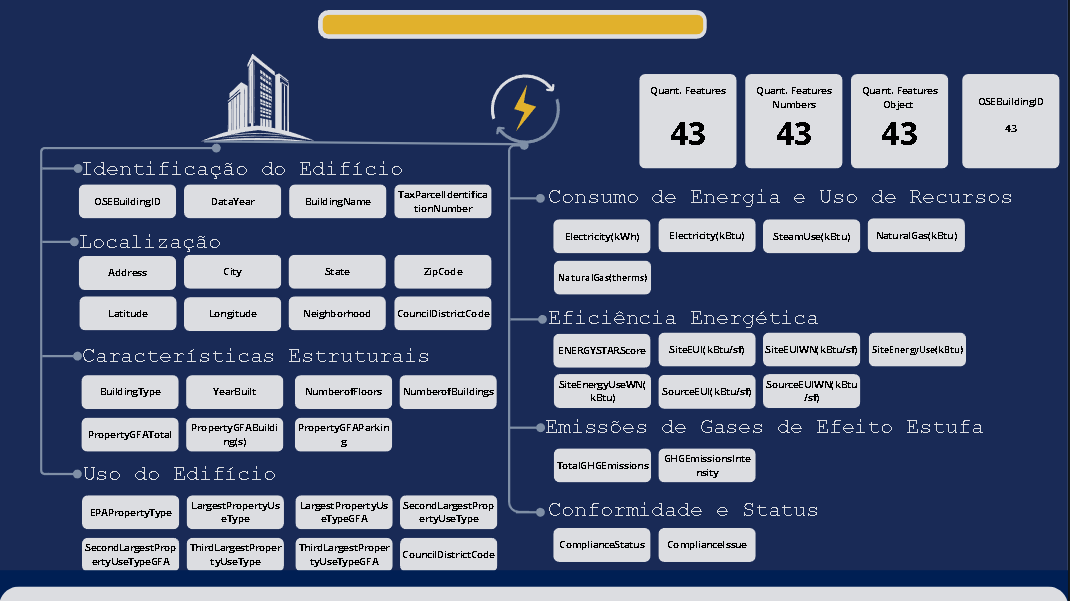

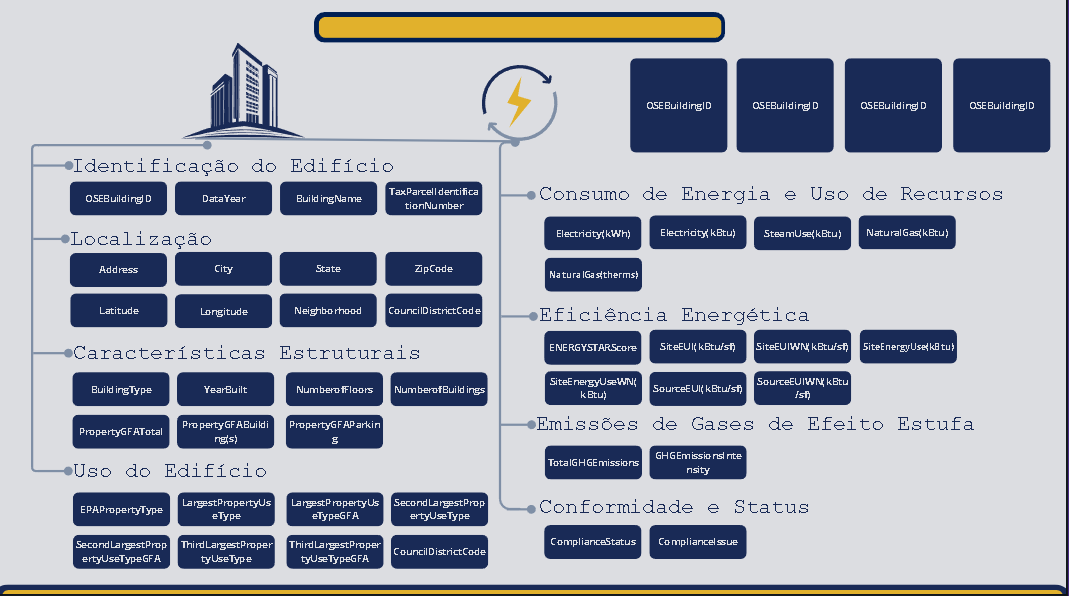

## 4. Exporting the Results

In [11]:
# path to save files
path_df = r'C:\Users\Yago\Desktop\GitHubLocal\UFC\ComputationalIntelligence\HW1\5.pre_processing\df_raw_seattle.csv'
path_data_dict =  r'C:\Users\Yago\Desktop\GitHubLocal\UFC\ComputationalIntelligence\HW1\5.pre_processing\data_dict_total.csv'

# export the Dataframe to csv:
df_raw_seattle.to_csv(path_df, index = False)

# export the Dicionary to csv:
data_dict.to_csv(path_data_dict, index = False)

# export the Dicionary to json:
#with open(path_json, 'w', encoding='utf-8') as f:
#    json.dump(data_dict, f, ensure_ascii=False, indent=4)

print("Files exports with sucess!")


Files exports with sucess!


In [ ]:
from nbconvert import HTMLExporter
from nbformat import read
import codecs

def export_notebook_to_html(notebook_path, html_output_path):
    # Carrega o notebook
    with open(notebook_path, 'r', encoding='utf-8') as nb_file:
        notebook_content = read(nb_file, as_version=4)

    # Configura o exportador para HTML
    html_exporter = HTMLExporter()
    html_data, _ = html_exporter.from_notebook_node(notebook_content)

    # Salva o HTML em um arquivo
    with codecs.open(html_output_path, 'w', encoding='utf-8') as html_file:
        html_file.write(html_data)

# Caminhos do arquivo
notebook_path = r'C:/Users/Yago/Desktop/GitHubLocal/UFC/ComputationalIntelligence/HW1/4.understanding_business_and_date/1.DataQueryandDictionary.ipynb'       # Insira o caminho do seu notebook
html_output_path = r'C:\Users\Yago\Desktop\GitHubLocal\UFC\ComputationalIntelligence\HW1\4.understanding_business_and_date\1.DataQueryandDictionary.html'           # Insira o caminho onde deseja salvar o HTML

# Executa a exportação
export_notebook_to_html(notebook_path, html_output_path)

## References

https://pandas.pydata.org/docs/user_guide/index.html#user-guide

https://www.seattle.gov/environment/climate-change/buildings-and-energy/energy-benchmarking/data-and-reports